<a href="https://colab.research.google.com/github/rikvik2006/MNIST-Challenge-PyTorch/blob/master/MNIST_Exercise_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installiamo le Dipendenze
Di default Google Collab ha gia installato le dipendenze che ci servono

## Imports
Importiamo i moduli che ci servono, dobbiamo importare torch, come libreria pricipale e poi la libreria torchvision, e da questa importiamo i 2 package datasets, e transforms

In [1]:
import torch
from torchvision import datasets, transforms

In [2]:
import torch.nn as nn
import torch.nn.functional as F

## Import per aggiustare i weights

In [3]:
import torch.optim as optim

Importiamo matploitlib per la visualizzazzione delle immagini

In [4]:
import matplotlib.pyplot as plt

## Controliamo se la GPU è disponibile

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("🖥️", device)

🖥️ cuda


# Neural Network Classes
Creiamo la classe della rete neurale, le classi delle reti neurali devono ereditare tutte dalla classe `nn.Module` che è la classe di base delle classi delle neural network.




In [6]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    # Immagine 28x28 = 784

    # Creiamo delle proprietà per che equivalgono ad ogni layer della rete neurale
    # Ogni neurone ha bisono di definire una funzione, noi utilizziamo la funzione Lineare
    # La funzione richiede come primo argomento il numero di neuroni in entrata, mentre il secondo paramentro indica i dati di output che devono uscire da ogni neurone
    self.inputLayer = nn.Linear(784, 64)
    # Ora definiamo
    self.hidden1 = nn.Linear(64, 64)  # Hidden 1 richide un tesore con 64 elemneti e restituisce un tesore con 64 elementi
    self.hidden2 = nn.Linear(64, 64)
    self.ouputLayer = nn.Linear(64, 10)

  def forward(self, data):
    data = F.relu(self.inputLayer(data))
    data = F.relu(self.hidden1(data))
    data = F.relu(self.hidden2(data))
    data = self.ouputLayer(data)

    return F.log_softmax(data, dim=1)

In [7]:
trainingData = datasets.MNIST("", train=True, download=True, transform=transforms.ToTensor());
testingData = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

100%|██████████| 9912422/9912422 [00:00<00:00, 291792139.78it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 30021237.63it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 150659885.77it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3749366.02it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [8]:
trainSet = torch.utils.data.DataLoader(trainingData, batch_size=10, shuffle=True)
testSet = torch.utils.data.DataLoader(testingData, batch_size=10, shuffle=True)

# Instanziamo la rete neurale

In [9]:
network = Network().to(device)

# Learning process


In [ ]:
learningRate = optim.Adam(network.parameters(), lr=0.01)
epochs = 4

🟣 tensor(0.4029, device='cuda:0', grad_fn=<NllLossBackward0>)
🟣 tensor(3.1166, device='cuda:0', grad_fn=<NllLossBackward0>)
🟣 tensor(0.2646, device='cuda:0', grad_fn=<NllLossBackward0>)
🟣 tensor(0.0151, device='cuda:0', grad_fn=<NllLossBackward0>)


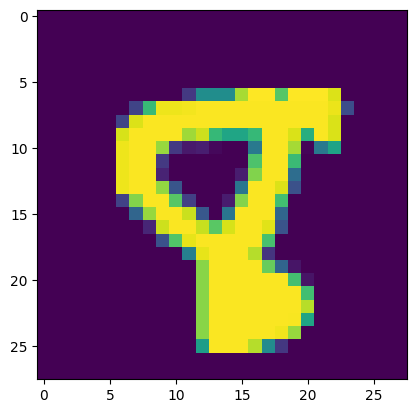

In [ ]:
for i in range(epochs):
  for images, labels in trainSet:
    # images, labels = data                             # Data is a tuple containg the batch, one is an array containg 10 (as the batch size)
                                                        # tensor of the images, and the other is an array containg the 10 labels that are the
                                                        # numbers write in the images
    images, labels = images.to(device), labels.to(device)

    network.zero_grad()
    outputs = network(images.view(-1, 784))
    # print("⚪", result)
    # print("🔢", labels)
    # print (f"🧪 ({result.shape} : {labels.shape})")
    loss = F.nll_loss(outputs, labels)
    # print("🔵", loss)
    loss.backward()
    # print("🔵", loss)
    learningRate.step()
    plt.imshow(images[0].cpu().view(28,28))
  print("🟣", loss)

    # print("---------------")
    # print(image)
    # print("---------------")
    # print(output)
    # print("---------------")
    # break

# Save the weights

In [ ]:
weight_version = 0

In [ ]:
# Salva i pesi del modello in un file (cwd: /content)
weight_version += 1
torch.save(network.state_dict(), f'MNIST_model_weights.pth.v{weight_version}')
print("Pesi del modello salvati.")

Pesi del modello salvati.


# Load the weights

In [12]:
# Carica i pesi del modello da un file
network.load_state_dict(torch.load('MNIST_model_weights.pth', map_location=device))
print("Pesi del modello caricati.")

Pesi del modello caricati.


In [13]:
correct = 0
total = 0

with torch.no_grad():
  for images, labels in testSet:
    images, labels = images.to(device), labels.to(device)
    # print("🟩", images)
    # print("🔢", labels)
    result = network(images.view(-1, 784))
    # print("⚪", result)
    for index, tensorValue in enumerate(result):
      total += 1
      if torch.argmax(tensorValue) == labels[index]:
        correct += 1

accuracy = correct / total
accuracyPercentage = accuracy * 100
print(f"Accuracy {accuracy}, Accuracy Percetage {accuracyPercentage}%")

Accuracy 0.9317, Accuracy Percetage 93.17%


### Importiamo Pillow per importare le immagini con in numeri 28x28 create dai noi


tensor(3, device='cuda:0')
Predicted number 3


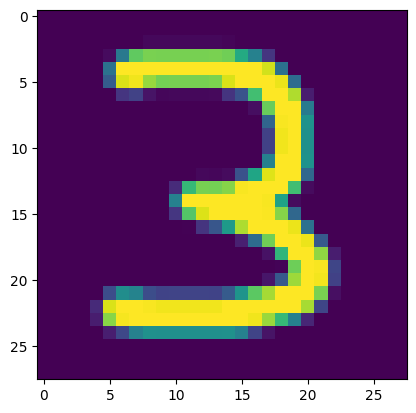

In [21]:
from PIL import Image
import PIL.ImageOps
import numpy as np

network.eval()
image = Image.open("imgTest3.png")
image = image.resize((28, 28)).convert("L")       # Resize the image and convert to grayscale
image = PIL.ImageOps.invert(image)

plt.imshow(image)

image = np.array(image)
image = image / 255                               # Normalize the array image beetween 0 and 1
image = torch.from_numpy(image)                   # Transform the numpy array in a torch tensor
image = image.float()
image = image.to(device)                          # Convert the tensor to a float tensor

with torch.no_grad():
  result = network.forward(image.view(-1, 28*28)) # Change the shape of a thesor i a matrix with n array with 28*28 elements
  prediction = torch.argmax(result)
  print(prediction)
  predicted_number = prediction.item()
  print("Predicted number", predicted_number)